<a href="https://colab.research.google.com/github/gustavolace/Cosine-Similarity-Based-CosmeticRecs/blob/main/CosmeticRecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
products = "https://raw.githubusercontent.com/gustavolace/Cosine-Similarity-Based-CosmeticRecs/main/cosmetic_train.csv"
df = pd.read_csv(products)

## DataFrame de Produtos da Loja de Cosméticos

Aqui temos o DataFrame dos produtos disponíveis na loja de cosméticos. Ele inclui informações como nomes, descrições, tipos, pesos, embalagens e preços.

- **Nomes:** Nomes dos produtos.
- **Descrição:** Descrição detalhada dos produtos.
- **Tipo:** Tipo do produto.
- **Peso:** Peso do produto.
- **Embalagem:** Tipo de embalagem do produto.
- **Preço:** Preço do produto.

Os campos **Tipo** e **Embalagem** são valores padrão e desempenham um papel crucial para identificar semelhanças entre os produtos.

A análise desses dados permite uma compreensão mais profunda da variedade de produtos oferecidos pela loja, facilitando a identificação de padrões e similaridades entre eles.


In [72]:
df.head(5)

,Nome,Descricao,Tipo,Peso,TipoEmbalagem,Preco,texto_completo
Produtos,,,,,,,
0,Loção Hidratante,Loção hidratante para pele seca,Hidratante,200ml,Frasco,25.99,Loção Hidratante Loção hidratante para pele se...
1,Shampoo Revitalizante,Shampoo para cabelos danificados,Shampoo,300ml,Frasco,15.50,Shampoo Revitalizante Shampoo para cabelos dan...
2,Perfume Floral,Perfume com fragrância floral,Perfume,50ml,Vidro,50.75,Perfume Floral Perfume com fragrância floral P...
3,Sabonete de Aloe Vera,Sabonete enriquecido com Aloe Vera,Sabonete,100g,Barras,8.99,Sabonete de Aloe Vera Sabonete enriquecido com...
4,Creme Anti-idade,Creme para prevenção de sinais de envelhecimento,Creme,50g,Pote,35.20,Creme Anti-idade Creme para prevenção de sinai...


## Utilização do CountVectorizer e Cosine Similarity

Ao consolidar todos os campos em um único texto, buscamos a aplicação do CountVectorizer. Este método analisa o texto palavra por palavra, examinando a frequência de cada termo na extensão total do texto. Posteriormente, utilizando o cosine similarity, realizaremos a análise dos cossenos para verificar quais produtos compartilham mais palavras em comum.

### Passos:

1. **Consolidação de Campos:**
   - Combinamos todas as informações em um único texto.

2. **CountVectorizer:**
   - Analisamos palavra por palavra.
   - Verificamos a frequência de cada termo na extensão total do texto.

3. **Cosine Similarity:**
   - Aplicamos o cosine similarity para comparar produtos.
   - Identificamos quais produtos têm mais palavras em comum.

Este processo permite uma análise mais aprofundada da similaridade entre os produtos, utilizando métodos estatísticos para `compreender a proximidade `semântica `e a relevância de palavras-chave` nos dados.


In [4]:
df['texto_completo'] = df.apply(lambda row: ' '.join(map(str, row)), axis=1)

In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['texto_completo'] )

In [6]:
cosine_similaridade = cosine_similarity(X) *100

In [7]:
df_similaridade = pd.DataFrame(cosine_similaridade, index=df['Nome'], columns=df.index)

## Visualização da Similaridade entre Produtos: `Mapa de Calor`

Após a análise utilizando CountVectorizer e Cosine Similarity, geramos um gráfico de calor de matriz para visualizar de forma intuitiva a intensidade da semelhança entre os produtos.

### Mapa de Calor:
   - Os eixos representam os produtos, comparando cada um com todos os outros.
   - Cores mais escuras indicam menor similaridade entre os produtos.
   - Cores mais claras representam maior similaridade.

`Este gráfico proporciona uma representação visual eficaz da proximidade entre os produtos com base nas análises anteriores.` Facilitando a identificação de grupos de produtos com características semelhantes e apoiando decisões estratégicas relacionadas ao posicionamento e marketing dos itens na loja.


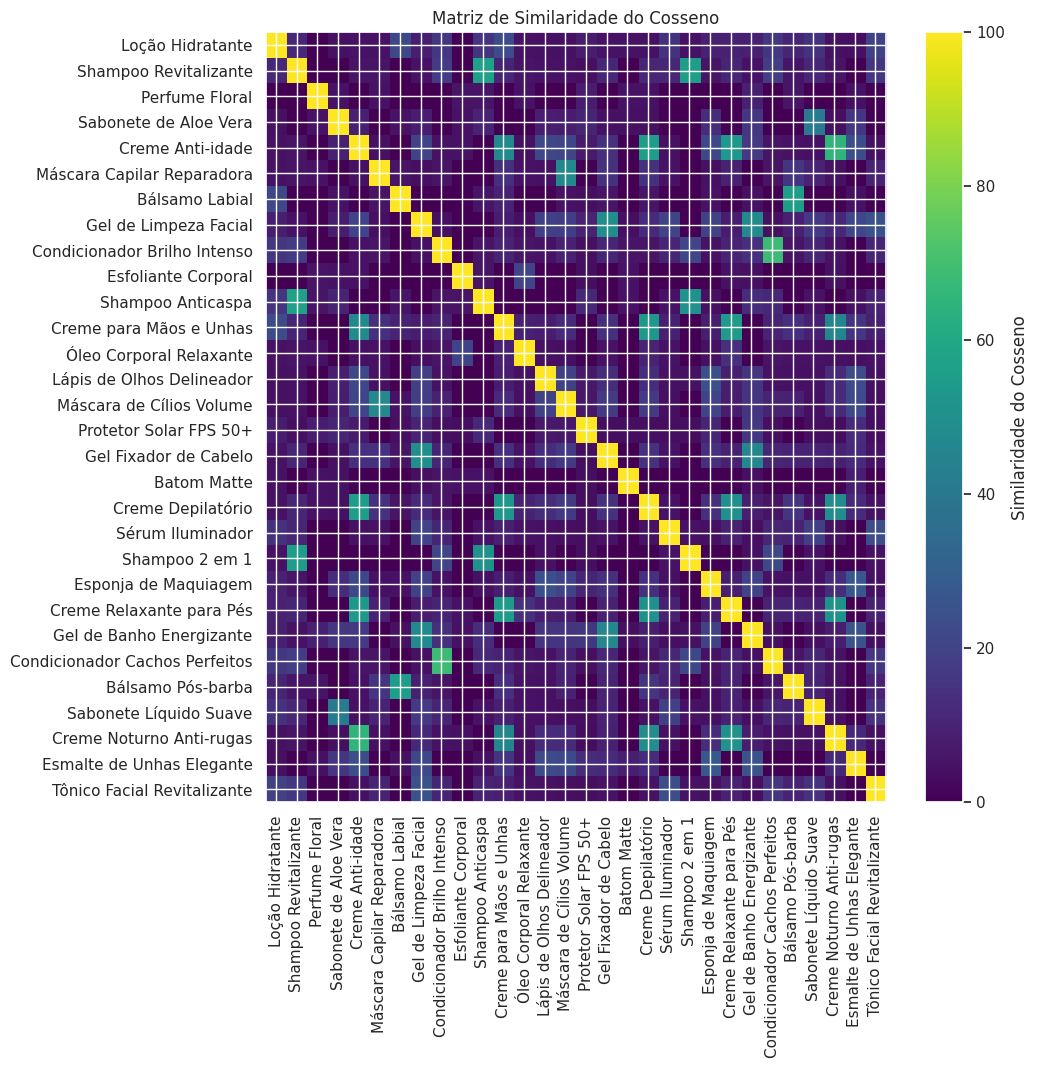

In [46]:
import matplotlib.pyplot as plt

# Assuming df_similaridade is your DataFrame
plt.figure(figsize=(10, 10))

# Adjust the aspect ratio to make cells square
plt.imshow(df_similaridade, cmap='viridis', interpolation='none', aspect='auto')

plt.colorbar(label='Similaridade do Cosseno')
plt.xticks(range(len(df_similaridade.index)), df_similaridade.index, rotation=90)
plt.yticks(range(len(df_similaridade.index)), df_similaridade.index)
plt.title('Matriz de Similaridade do Cosseno')
plt.show()


## Análise de Produto Específico: Shampoo Anticaspa

Ao identificar o interesse do usuário em um produto específico, como o "Shampoo Anticaspa", podemos realizar uma análise para recomendar opções similares. Seguimos os seguintes passos:

1. **Seleção do Produto de Interesse:**
   - Produto Selecionado: "Shampoo Anticaspa".

2. **Identificação de Produtos Similares:**
   - `Utilizando CountVectorizer e Cosine Similarity, selecionamos os 3 produtos mais similares ao "Shampoo Anticaspa".`
   - Exibimos a lista com a porcentagem de similaridade de cada produto.

### Recomendações:
1. **Produto Similar 1:**
   - Nome: Shampoo Anticaspa
   - Similaridade: `100%`

2. **Produto Similar 2:**
   - Nome: Shampoo Revitalizante
   - Similaridade: `57.35%`

3. **Produto Similar 3:**
   - Nome: Shampoo 2 em 1
   - Similaridade: `51.30%`

### Gráfico de Comparação:
   - Visualização da similaridade entre o "Shampoo Anticaspa" e todos os produtos disponíveis na loja.

Este método proporciona uma abordagem personalizada, recomendando produtos similares ao item de interesse do usuário. A exibição clara das opções, juntamente com a porcentagem de similaridade, facilita a tomada de decisão e melhora a experiência do usuário.


In [76]:
# Produto específico para análise de similaridade
produto_analisado = 'Shampoo Anticaspa'
similaridades_produto_analisado = df_similaridade.loc[produto_analisado]

top3_indices = similaridades_produto_analisado.argsort()[-3:][::-1]

top3_nomes_produtos = df_similaridade.index[top3_indices]
top3_valores_similaridade = similaridades_produto_analisado.iloc[top3_indices]


for nome, valor in zip(top3_nomes_produtos, top3_valores_similaridade):
     print(f"Produto: {nome}, Similaridade: {valor:.2f}")


Produto: Shampoo Anticaspa, Similaridade: 100.00
Produto: Shampoo Revitalizante, Similaridade: 57.35
Produto: Shampoo 2 em 1, Similaridade: 51.30


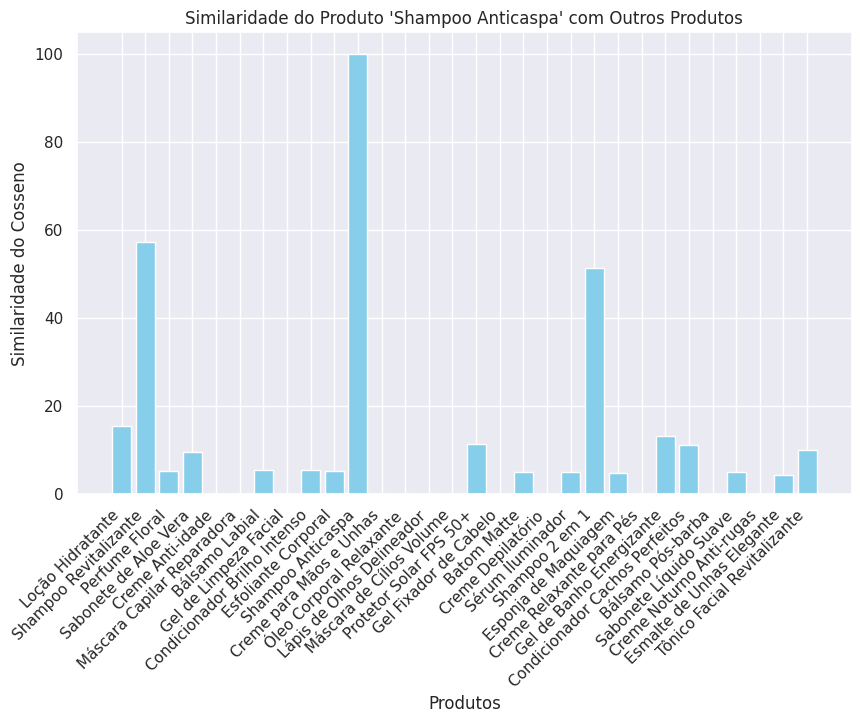

In [52]:
# Produto específico para análise de similaridade
produto_analisado = 'Shampoo Anticaspa'
similaridades_produto_analisado = df_similaridade.loc[produto_analisado]

plt.figure(figsize=(10, 6))
similaridades_produto_analisado.index.name = 'Produtos'
similaridades_produto_analisado.reset_index()
plt.bar(similaridades_produto_analisado.index, similaridades_produto_analisado, color='skyblue')
plt.title(f"Similaridade do Produto '{produto_analisado}' com Outros Produtos")
plt.xlabel("Produtos")
plt.ylabel("Similaridade do Cosseno")
plt.xticks(similaridades_produto_analisado.index, df_similaridade.index, rotation=45, ha='right')
plt.show()